## Deadline

Wednesday, November 22, 2017, 11:59PM

## Important notes

- When you push your Notebook to GitHub, all the cells must already have been evaluated.
- Don't forget to add a textual description of your thought process and of any assumptions you've made.
- Please write all your comments in English, and use meaningful variable names in your code.

## Question 1: Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 5 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

#### 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?

#### 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

#### 3. A propsensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

#### 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?


#### 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


#### 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


___

## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).


2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.




# 1. Propensity score matching

In [25]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
# Load dataset
df = pd.read_csv('lalonde.csv')
df.head(5)
df.tail(5)

## 1.1 A naive analysis

Compare the distribution of the outcome variable (re78) between the two groups, using plots and numbers. To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").
What might a naive "researcher" conclude from this superficial analysis?

In [ ]:
treat_df = df[df.treat == 1]
treat_df.describe()

In [ ]:
control_df = df[df.treat == 0]
control_df.describe()

We notice that the two groups "treat" and "control" differ a lot in term of average income in '74 before the treatment:
* mean of income in '74 for subjects that took part in the training program = **2095.57**
* mean of income in '74 for subjects that didn't take part in the training program = **5619.23**

in order to correctly study the effectiveness of the treatment and to correctly compare the two groups we'll use the folling quantity:

**Income in '78 (after the training program) - Income in '74 (before the training program)**

In other words, we'll compare the _increase of salary_ for the two groups, and not just the salary measured in '78, as suggested in the assignment. In our opinion this makes much more sense, since the two groups in this dataset are definetly unequal under this paramenter.

## First naïve visualization of the data:
here we visualize the distribution of the increase of income for the two groups:
* we visualize the distributions of the increase of income on the same graph for the two groups;
* we visualize two boxplots of the two distributions already plotted to get a better understanding of the data

In [ ]:
# Visualizing distributions
income_increase_treatment = treat_df.re78-treat_df.re74
income_increase_control = control_df.re78-control_df.re74

plt.figure(figsize=(15,7))
# plotting the distribution of the income increase for treatment group
ax1 = sns.distplot(income_increase_treatment, kde=True, color="g")
ax1.set_ylabel('# of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')
# plotting the distribution of the income increase for control group
ax2 = sns.distplot(income_increase_control, kde=True, color="r")

In [ ]:
plt.figure(figsize=(15,7))
ax1 = sns.distplot(income_increase_treatment, kde=True, color="g")
ax1.set_ylabel('# of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')


ax2 = sns.distplot(income_increase_control, kde=True, color="r")

We can see that the distribution for the people that took part in the program (in green) is **clearly shifted to the right** siggesting (at first sight) a clear effectiveness of the training program! Let's visualize the boxplots of the two distributions to get a better understanding of them:

In [ ]:
# Stats for people who participated on the training program
print('Skew:', income_increase_treatment.skew())
print(income_increase_treatment.describe())

# Visualisation of the distribution with a boxplot
maxvalue = np.max(income_increase_treatment) * 1.05
minvalue = np.min(income_increase_treatment) * 1.05
plt.figure(figsize=(10,4))
ax1 = sns.boxplot(x=income_increase_treatment, palette="Set2")
plt.title('Income increase for partecipants of the program from \'74 (pre-training) to \'78 (post-training)', fontsize=20).set_weight('bold')
ax1.set_xlabel('Income increase', fontsize=16).set_weight('bold')
plt.xlim(minvalue, maxvalue)

In [ ]:
# Stats for people who don't participated to the training program
print('Skew:', income_increase_control.skew())
print(income_increase_control.describe())
maxvalue = np.max(income_increase_control) * 1.05
minvalue = np.min(income_increase_control) * 1.05
plt.figure(figsize=(10,4))
ax1 = sns.boxplot(x=income_increase_control, palette="Set1")
plt.title('Income increase for control group from \'74 (pre-training) to \'78 (post training)', fontsize=20).set_weight('bold')
ax1.set_xlabel('Income increase', fontsize=16).set_weight('bold')
plt.xlim(minvalue, maxvalue)

With a Naive analysis, it can be concluded:
- The mean income increase change a lot with the training programs!
    * mean income increase for partecipants in the program: **4253.14**
    * mean income increase for non-partecipants in the program: **1364.93**
- The distributions of the outcome of people that have assisted in training programs is more heavy tailed (positive skewed). If the maximum income in '78 is compared, the one for people that have assisted to the program is 60'307 chf and the one of the people that does not assited is 25'564. 
- The number of observations differ heavily: we have only 185 people in the treated group, and 429 people in the control group

## 1.2) A closer look to the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above. You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.
For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers. As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.
What do you observe? Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

#### Plot helper functions

In [ ]:
# Plot helper functions
def value_barplot_label(plot_name):
    # Inserts the value label on the top of each bar.

    for p in plot_name.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height,'{:0.0f}'.format(height), ha="center").set_weight('bold')

def tick_format(plot,tick_type):
    if tick_type == 1:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
            label.set_rotation(90)
            
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
        
    if tick_type == 2:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)

        for label in plot.get_yticklabels():
            label.set_fontsize(14)

def value_counts_plot(feature, title, xlabel, ylabel):
    # Visualize how many universitie sper country are there in the best 200 ranking
    plt.figure(figsize=(7,5))
    ax = sns.barplot(x=df[feature].value_counts().index, y=df[feature].value_counts())
    plt.title(title, fontsize=25).set_weight('bold')
    tick_format(ax, 2)
    value_barplot_label(ax)
    ax.set_ylabel(ylabel, fontsize=16).set_weight('bold')
    ax.set_xlabel(xlabel, fontsize=16).set_weight('bold')

### 1.2.1 treat

In [ ]:
# Visualize 
plt.figure(figsize=(7,5))
ax = sns.barplot(x=df.treat.value_counts().index, y=df.treat.value_counts())
plt.title("Treated and control group", fontsize=25).set_weight('bold')
tick_format(ax, 2)
value_barplot_label(ax)
ax.set_ylabel('number on people', fontsize=16).set_weight('bold')
ax.set_xlabel('0: control group, 1: treated group', fontsize=16).set_weight('bold')

### 1.2.2 Age

In [ ]:
# Treat value counts
# Visualize 
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df.age, palette="Greens")
plt.title("Age distribution", fontsize=25).set_weight('bold')
tick_format(ax, 2)
value_barplot_label(ax)
ax.set_ylabel('Count', fontsize=16).set_weight('bold')
ax.set_xlabel('Age', fontsize=16).set_weight('bold')

print("Age describe: ", df.age.describe())

In [ ]:
# Visualizing distributions
part_age = df[df.treat == 1].age[df[df.treat == 1].age != 0]
nonpart_age = df[df.treat == 0].age[df[df.treat == 0].age != 0]

plt.figure(figsize=(15,7))
ax1 = sns.distplot(part_age, kde=True, color="g")
ax1.set_ylabel('% of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')
ax1.legend(label='Non-assisted')
ax2 = sns.distplot(nonpart_age, kde=True, color="r")
ax2.legend(label='Non-assisted')

print("Assisted describe: ", part_age.describe())
print("Assisted skew: ", part_age.skew())
print("Non-Assisted describe: ", nonpart_age.describe())
print("Non-Assisted skew: ", nonpart_age.skew())

### 1.2.3 educ

In [ ]:
# Visualize 
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df.educ.value_counts().index, y=df.educ.value_counts(), palette="terrain_r")
plt.title("Years of education", fontsize=25).set_weight('bold')
tick_format(ax, 2)
value_barplot_label(ax)
ax.set_ylabel('Counts', fontsize=16).set_weight('bold')
ax.set_xlabel('Years of education', fontsize=16).set_weight('bold')

In [ ]:
# Visualizing distributions
part_educ = df[df.treat == 1].educ
nonpart_educ = df[df.treat == 0].educ

plt.figure(figsize=(15,7))
ax1 = sns.distplot(part_educ, kde=True, color="g")
ax1.set_ylabel('% of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')
ax1.legend(label='Non-assisted')
ax2 = sns.distplot(nonpart_educ, kde=True, color="r")
ax2.legend(label='Non-assisted')

print("Assisted describe: ", part_educ.describe())
print("Assisted skew: ", part_educ.skew())
print("Non-Assisted describe: ", nonpart_educ.describe())
print("Non-Assisted skew: ", nonpart_educ.skew())

### 1.2.3 race

In [ ]:
def add_race(df,x):
    
    if (df.black.loc[x]==0 & df.hispan.loc[x]==0):
        race=0
    elif (df.black.loc[x]==1 & df.hispan.loc[x]==0):
        race=1
    elif (df.black.loc[x]==0 & df.hispan.loc[x]==1):
        race=2

    return race

In [ ]:
df['race'] = 0
df.race[df.black == 1] = 1
df.race[df.hispan == 1] = 2

In [ ]:
# Visualize 
plt.figure(figsize=(7,5))
ax = sns.barplot(x=df.race.value_counts().index, y=df.race.value_counts())
plt.title("Race", fontsize=25).set_weight('bold')
tick_format(ax, 2)
value_barplot_label(ax)
ax.set_ylabel('Count', fontsize=16).set_weight('bold')
ax.set_xlabel('0: White, 1:Black, 2:Hispan', fontsize=16).set_weight('bold')

We can see that the race of the participants is also unbalanced.

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.factorplot(x="race", y="treat", data=df,
                   size=6, kind="bar", palette="muted")
plt.title("Participation rate per race", fontsize=25).set_weight('bold')
ax.set_ylabels("Participation rate", fontsize=16)
ax.set_xlabels("0: White, 1:Black, 2:Hispan", fontsize=16)

### 1.2.4 married

In [ ]:
# Visualize 
plt.figure(figsize=(7,5))
ax = sns.barplot(x=df.married.value_counts().index, y=df.married.value_counts())
plt.title("Married", fontsize=25).set_weight('bold')
tick_format(ax, 2)
value_barplot_label(ax)
ax.set_ylabel('Count', fontsize=16).set_weight('bold')
ax.set_xlabel('0: Non-married, 1:Married', fontsize=16).set_weight('bold')

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.factorplot(x="married", y="treat", data=df,
                   size=6, kind="bar", palette="muted")
plt.title("Participation rate per marriage", fontsize=25).set_weight('bold')
ax.set_ylabels("Participation rate", fontsize=16)
ax.set_xlabels("0: Non-married, 1:Married", fontsize=16)

### 1.2.5 Non degree

In [ ]:
# Visualize 
plt.figure(figsize=(7,5))
ax = sns.barplot(x=df.nodegree.value_counts().index, y=df.nodegree.value_counts())
plt.title("School degree", fontsize=25).set_weight('bold')
tick_format(ax, 2)
value_barplot_label(ax)
ax.set_ylabel('Count', fontsize=16).set_weight('bold')
ax.set_xlabel('0: YES    1:NO', fontsize=16).set_weight('bold')

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.factorplot(x="nodegree", y="treat", data=df,
                   size=6, kind="bar", palette="muted")
plt.title("Participation rate per school degree obtention", fontsize=25).set_weight('bold')
ax.set_ylabels("Participation rate", fontsize=16)
ax.set_xlabels("0: YES    1:NO", fontsize=16)

### 1.2.6 re74

### 1.2.7 re75

### 1.2.8 re78

## 1.3 A propensity score model
Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)


In [ ]:
# Import ML library
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, classification_report

# Build a regressor
logistic = linear_model.LogisticRegression()

In [ ]:
# Create feature matrix and prediction vector
feature_cols = ['age', 'educ', 'race', 'married', 'nodegree','re74','re75','re78']
X = df[feature_cols]
y = df.treat

X.describe()

In [ ]:
logistic.fit(X, y)  # train it

In [ ]:
pred = logistic.predict_proba(X)
propensity_score=pred[:,1]

y_pred = logistic.predict(X)
df['prediction']= y_pred
df['propensity score']= propensity_score

In [ ]:
df.head()

In [ ]:
print(classification_report(y, y_pred))

## 1.4 Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?

## ANSWER 
As LaLonde suggests in his work, "the mean earnings of the AFDC treatments and the AFDC controls in the year before train- ing differ by $2, the mean age of the two groups differ by 3 months, and the mean years of schooling are identical. None of the differences between the treatment's and control's characteristics, hours, and earnings are statistically significant."

In [ ]:
from scipy.optimize import linear_sum_assignment

control_df = df[df['treat']==0].reset_index(drop=True)
treat_df = df[df['treat']==1].reset_index(drop=True)

def match(treat_df, control_df):
    
    # we store in prop1, prop2 the vectors of the propensity scorse of the two groups
    prop1 = treat_df['propensity score']
    prop0 = control_df['propensity score']
    
    # building the matrix of costs of the arches of the bipartite graph
    cost = np.array([np.abs(p-prop0) for p in prop1])
    
    # With this simple command we find the desired matches!
    row_ind, col_ind = linear_sum_assignment(cost)
    
    # we extract the matched people from treatment and control group
    matched_treat_df = treat_df.loc[row_ind]
    matched_control_df = control_df.loc[col_ind]
    # we add a new feature to the treatment: the ID of the matched person in the control group
    matched_treat_df['matched control ID']=col_ind
    # we merge the dataframe, to have the data of the matched people on the same row!
    merged_df = pd.merge(matched_treat_df, matched_control_df,left_on='matched control ID', right_index=True)
    
    # we creae the new feature 'RESULTS OF TREATMENT'
    merged_df['RESULT OF TREATMENT']=(merged_df.re78_x-merged_df.re74_x)-\
                                     (merged_df.re78_y-merged_df.re74_y)
    # we create the concatenated dataframe with the matched control and treatment group
    concat_df = pd.concat([matched_treat_df, matched_control_df])
    
    return matched_treat_df,matched_control_df, merged_df, concat_df


treat_df, new_control_df, matched_df, new_df = match(treat_df, control_df)


Oh yeah! Let's go for the viz:

In [ ]:
# Visualizing distributions
part = treat_df.re78-treat_df.re74
nonpart = new_control_df.re78 - new_control_df.re74

plt.figure(figsize=(15,7))
ax1 = sns.distplot(part, kde=True, color="g")
ax1.set_ylabel('# of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')
ax1.legend(label='Non-assisted')

ax2 = sns.distplot(nonpart, kde=True, color="r")
ax2.legend(label='Non-assisted')

Just a check on the merged dataframe: this should return cost[row_ind, col_ind].sum()

We see that now **the clear shift to the right of the green distribution is disappeared!**

In [ ]:
(abs(matched_df['propensity score_x']-matched_df['propensity score_y'])).sum()

In [ ]:
# Visualizing distributions
plt.figure(figsize=(15,7))
ax1 = sns.boxplot(matched_df['RESULT OF TREATMENT'], color="g")
ax1.set_ylabel('Result of treatment', fontsize=16).set_weight('bold')
ax1.set_xlabel('Difference in increase of income', fontsize=16).set_weight('bold')
ax1.legend(label='difference')

Let's repeat the analysis of point 1.2 with the new control group:

In [ ]:
# Visualize 
plt.figure(figsize=(7,5))
ax = sns.barplot(x=new_df.treat.value_counts().index, y=new_df.treat.value_counts())
plt.title("Training program", fontsize=25).set_weight('bold')
tick_format(ax, 2)
value_barplot_label(ax)
ax.set_ylabel('Count', fontsize=16).set_weight('bold')
ax.set_xlabel('0: Not-assisted, 1: Assisted', fontsize=16).set_weight('bold')

### 1.2.2 Age

In [ ]:
# Visualizing distributions
part_age = new_df[new_df.treat == 1].age[new_df[new_df.treat == 1].age != 0]
nonpart_age = new_df[new_df.treat == 0].age[new_df[new_df.treat == 0].age != 0]

plt.figure(figsize=(15,7))
ax1 = sns.distplot(part_age, kde=True, color="g")
ax1.set_ylabel('% of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')
ax1.legend(label='Non-assisted')
ax2 = sns.distplot(nonpart_age, kde=True, color="r")
ax2.legend(label='Non-assisted')

print("Assisted describe: ", part_age.describe())
print("Assisted skew: ", part_age.skew())
print("Non-Assisted describe: ", nonpart_age.describe())
print("Non-Assisted skew: ", nonpart_age.skew())

### 1.2.3 educ

In [ ]:
# Visualizing distributions
part_educ = new_df[new_df.treat == 1].educ
nonpart_educ = new_df[new_df.treat == 0].educ

plt.figure(figsize=(15,7))
ax1 = sns.distplot(part_educ, kde=True, color="g")
ax1.set_ylabel('% of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')
ax1.legend(label='Non-assisted')
ax2 = sns.distplot(nonpart_educ, kde=True, color="r")
ax2.legend(label='Non-assisted')

print("Assisted describe: ", part_educ.describe())
print("Assisted skew: ", part_educ.skew())
print("Non-Assisted describe: ", nonpart_educ.describe())
print("Non-Assisted skew: ", nonpart_educ.skew())

### 1.2.3 race

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.factorplot(x="race", y="treat", data=new_df,
                   size=6, kind="bar", palette="muted")
plt.title("Participation rate per race", fontsize=25).set_weight('bold')
ax.set_ylabels("Participation rate", fontsize=16)
ax.set_xlabels("0: White, 1:Black, 2:Hispan", fontsize=16)

### 1.2.4 married

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.factorplot(x="married", y="treat", data=new_df,
                   size=6, kind="bar", palette="muted")
plt.title("Participation rate per marriage", fontsize=25).set_weight('bold')
ax.set_ylabels("Participation rate", fontsize=16)
ax.set_xlabels("0: Non-married, 1:Married", fontsize=16)

### 1.2.5 Non degree

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.factorplot(x="nodegree", y="treat", data=new_df,
                   size=6, kind="bar", palette="muted")
plt.title("Participation rate per school degree obtention", fontsize=25).set_weight('bold')
ax.set_ylabels("Participation rate", fontsize=16)
ax.set_xlabels("0: YES    1:NO", fontsize=16)

## 1.5 Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.

In [ ]:
treat_white_df = treat_df[treat_df.race==0].reset_index(drop=True)
treat_black_df = treat_df[treat_df.race==1].reset_index(drop=True)
treat_hispanic_df = treat_df[treat_df.race==2].reset_index(drop=True)

control_white_df = control_df[control_df.race==0].reset_index(drop=True)
control_black_df = control_df[control_df.race==1].reset_index(drop=True)
control_hispanic_df = control_df[control_df.race==2].reset_index(drop=True)

In [ ]:
print(treat_white_df.shape, control_white_df.shape)
print(treat_black_df.shape, control_black_df.shape)
print(treat_hispanic_df.shape, control_hispanic_df.shape)

THERE ARE LESS BLACK PEOPLE IN THE CONTROL THAN IN THE TREATMENT! THIS IS NOT GOOD 'CAUSE I CAN'T FIND A MATCH FOR EVERY TREATED ONE -> I HAVE TO REDUCE THE TREATED BLACK PEOPLE TO 87

In [ ]:
treat_white_df, control_white_df, merged_white_df, concat_white_df = match(treat_white_df, control_white_df)
treat_black_df, control_black_df, merged_black_df, concat_black_df = match(treat_black_df, control_black_df)
treat_hispanic_df, control_hispanic_df, merged_hispanic_df, concat_hispanic_df = match(treat_hispanic_df, control_hispanic_df)


In [ ]:
print(treat_white_df.shape, control_white_df.shape)
print(treat_black_df.shape, control_black_df.shape)
print(treat_hispanic_df.shape, control_hispanic_df.shape)

In [ ]:
newnew_treat_df = pd.concat([treat_white_df,treat_black_df,treat_hispanic_df])
newnew_control_df = pd.concat([control_white_df,control_black_df,control_hispanic_df])

newnew_df = pd.concat([newnew_treat_df,newnew_control_df])

newnew_df.head()

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.factorplot(x="race", y="treat", data=newnew_df,
                   size=6, kind="bar", palette="muted")
plt.title("Participation rate per race", fontsize=25).set_weight('bold')
ax.set_ylabels("Participation rate", fontsize=16)
ax.set_xlabels("0: White, 1:Black, 2:Hispan", fontsize=16)

In [ ]:
merged_df = pd.concat([merged_white_df,merged_black_df,merged_hispanic_df])

## 1.6 A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?

In [ ]:
# Visualizing distributions
income_increase_treated = newnew_treat_df.re78-newnew_treat_df.re74
income_increase_control = newnew_control_df.re78-newnew_control_df.re74

plt.figure(figsize=(15,7))
ax1 = sns.distplot(income_increase_treated, kde=True, color="g")
ax1.set_ylabel('# of people', fontsize=16).set_weight('bold')
ax1.set_xlabel('Outcome', fontsize=16).set_weight('bold')
ax1.legend(label='Non-assisted')

ax2 = sns.distplot(income_increase_control, kde=True, color="r")
ax2.legend(label='Non-assisted')

In [ ]:
plt.figure(figsize=(15,7))
ax1 = sns.boxplot(merged_df['RESULT OF TREATMENT'], color="g")
ax1.set_ylabel('Result of treatment', fontsize=16).set_weight('bold')
ax1.set_xlabel('Difference in Outcome', fontsize=16).set_weight('bold')
ax1.legend(label='difference')

# 2. Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).

2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.



## 2.1 Load dataset and vectorize

A classifier of news is going to be built to assign 20 news categories. Let's import the dataset and check the different categories:

In [48]:
# Import libraries
from sklearn.datasets import fetch_20newsgroups # Data function that dowloads the data from archive
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from pprint import pprint
from time import time
import itertools

In [35]:
# Import dataset
newsgroups = fetch_20newsgroups(subset='all', remove = ('headers', 'footers', 'quotes'))

# Show categories list
pprint(list(newsgroups.target_names))
classes = newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Let's check the dataset shape and how is like each datapoint:

In [3]:
# The real data lies in the filenames and target attributes(target category)
print('Filenames shape:', newsgroups.filenames.shape)
print('Target shape:',newsgroups.target.shape)

# Show 
newsgroups.data[1]

Filenames shape: (18846,)
Target shape: (18846,)


'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-performance VLB card\n\n\nPlease post or email.  Thank you!\n\n  - Matt\n'

In [19]:
# Vectorize the text dataset
vectorizer = TfidfVectorizer(max_features=10000, max_df=0.5, stop_words='english')
vectors = vectorizer.fit_transform(newsgroups.data)
vectors.shape

(18846, 10000)

### Split in training, testing and validation sets

Split training (80%), testing(10%) and validation (10%) sets

In [20]:
# Create predictors and predicted variable
X = vectors
y = newsgroups.target

# Split training, testing and validation tests
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=0, train_size=0.5)

In [23]:
rand_state = 50

# Create a fit the classifier
rand_forest = RandomForestClassifier(n_estimators=100, random_state=rand_state)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=50,
            verbose=0, warm_start=False)

In [22]:
# First Evaluation
print('Train score:',rand_forest.score(X_train, y_train))
print('Test score:',rand_forest.score(X_test, y_test))
print('Validation score:',rand_forest.score(X_val, y_val))

Train score: 0.963650835765
Test score: 0.581432360743
Validation score: 0.577188328912


It can be observed that the first fitting of the classifier on the test and validation sets are not very good.

In [26]:
print('Number of features:',rand_forest.n_features_)
print('Features importances:',rand_forest.feature_importances_)
depths = pd.Series([estimator.tree_.max_depth for estimator in rand_forest.estimators_])
depths.describe()

Number of features: 10000
Features importances: [  5.15972280e-04   2.39288116e-04   3.11560725e-06 ...,   0.00000000e+00
   7.56002595e-05   2.89388934e-06]


count    100.000000
mean     827.760000
std       24.148162
min      770.000000
25%      809.000000
50%      827.500000
75%      844.250000
max      898.000000
dtype: float64

Watching at the max depth statistical description all estimators will help us to know how to tune better this parameter.

### Grid search

In [45]:
# Parameters of the grid search
n_estim_range = np.round(np.logspace(1,2,num=2,dtype=int))
max_depth_range = np.round(np.logspace(1,3.2,num=4,dtype=int))
paramgrid = {'n_estimators': n_estim_range,'max_depth': max_depth_range}

# Grid search on the number of estimators
clf = GridSearchCV(RandomForestClassifier(random_state=rand_state), paramgrid, cv = 3)
clf.fit(X_train, y_train)
print('Best parameters:',clf.best_params_)

Best parameters: {'max_depth': 292, 'n_estimators': 100}


In [46]:
# Evaluation
print('Train score:',clf.score(X_train, y_train))
print('Test score:',clf.score(X_test, y_test))
print('Validation score:',clf.score(X_val, y_val))

Train score: 0.96424781109
Test score: 0.645623342175
Validation score: 0.635543766578


## Confusion matrix

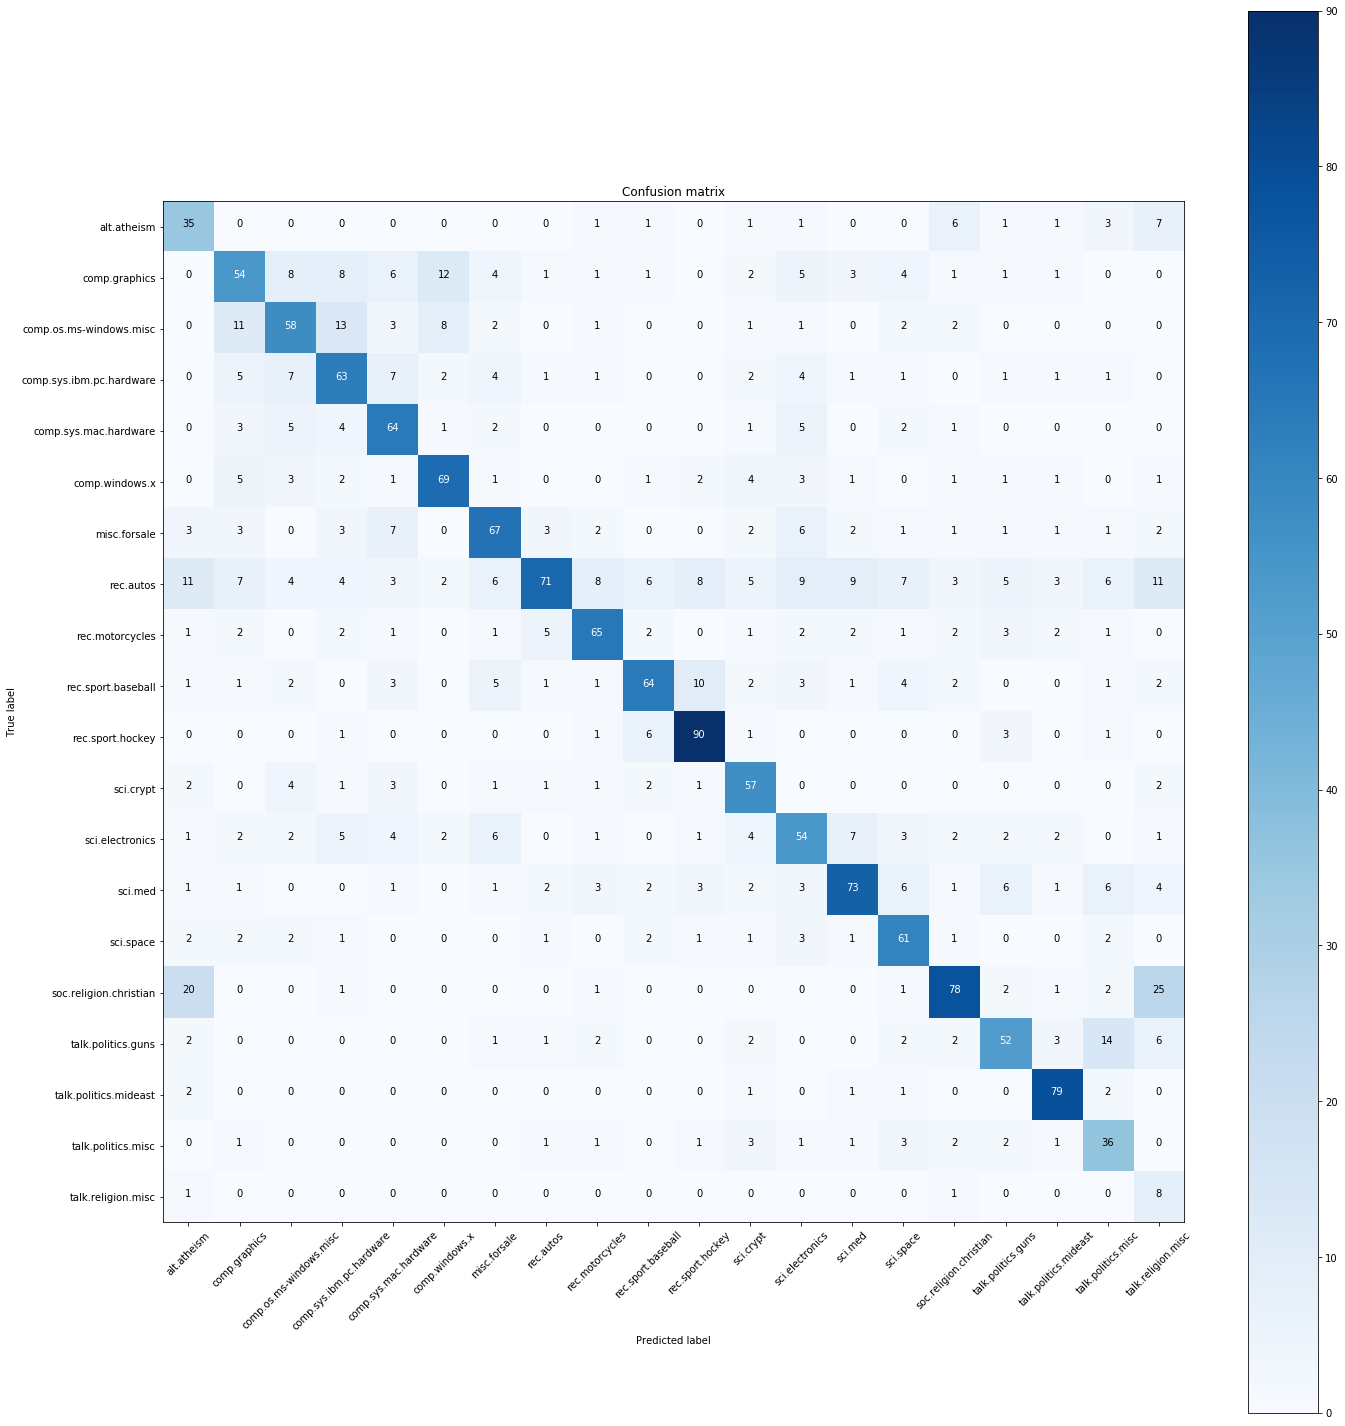

In [50]:
# Compute the confusion matrix
y_pred = clf.predict(X_val)
cm = confusion_matrix(y_pred, y_val)

# Plot it!
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

normalize=False
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 2.2.Results discussion

In [51]:
print('Number of features:',rand_forest.n_features_)
print('Features importances:',rand_forest.feature_importances_)
depths = pd.Series([estimator.tree_.max_depth for estimator in rand_forest.estimators_])
depths.describe()

Number of features: 10000
Features importances: [  5.15972280e-04   2.39288116e-04   3.11560725e-06 ...,   0.00000000e+00
   7.56002595e-05   2.89388934e-06]


count    100.000000
mean     827.760000
std       24.148162
min      770.000000
25%      809.000000
50%      827.500000
75%      844.250000
max      898.000000
dtype: float64